<a href="https://colab.research.google.com/github/Yinkizo/Assignmentfiles/blob/main/Assignment_NRCAN_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download an unzip the assignment

Please download the ``extracted_uc_merced_land_dataset.zip`` dataset from D2L website, drag and drop it to the *Files* section. We then use the code below to extract the zip file.

In [ ]:
from zipfile import ZipFile # This library allows us to extract zip files using python
data_zip_name = 'extracted_uc_merced_land_dataset.zip' # This is the zip file name
zip = ZipFile(data_zip_name) # we first open the zip folder with the library
zip.extractall() # we ask the library to extract it
zip.close() # we close the zip folder since we don't use it any more

After running the above code, you can notice that the folder extracted_uc_merced_land_dataset is now available in the Files. Explore the folder structure by opening it. Each folder contains 100 images belonging to each class. The folder name indicates the class name e.g., river, forest and buildings.

In [ ]:
import os # This function works with the distinct files and directories in our environment.
 
data_folder_name = 'extracted_uc_merced_land_dataset' # Name of the extracted files
class_names = [x[1] for x in os.walk(data_folder_name)][0] # using a loop, we are getting whats inside each of the folder presented in the extacted folder
print(class_names) # prinitng whats inside of the classes

['buildings', 'forest', 'river']


Now we will be importing some necessary packages ( such as PIL, glob, numpy ) to store all the image and its class information in a numpy array. The numpy array will help us to visualize the images in an array format.

In [ ]:
from PIL import Image # importing image function from the python imaging library (PIL)
import glob # glob (short for global) is used to return all file paths that match a specific pattern. We used glob to search for a specific file pattern, or perhaps more usefully, search for files where the filename matches a certain pattern by using wildcard characters
import numpy as np # NumPy is a Python library used for working with arrays.
image_data = [] # To store the image data as a numpy array, we are implementing a list.

for class_name in class_names: # Iterating over the class names ( defined earlier in the for loop)
  # class_name = 'buildings'
  _images = []
  for filename in glob.glob('extracted_uc_merced_land_dataset/' + class_name +'/*.tif'): # since the image format is in tiff, we are going to convert each tiff image ( thus the *.tiff) in to a numpy array
      im=np.asarray(Image.open(filename)) # Opening each images in the individual folder and making it as an array
      _images.append(im) # appenidnng them one after one for storing them in the data.
  image_data.append(np.array(_images)) # at the end of first for loop, storing them sequentially ( using append) on the image data

image_data = np.array(image_data) # Store all the image information in the image data.

In [ ]:
# To check how the stored numoy array looked after the brief preprocessing, we use the .shape function 
image_data.shape

(3, 98, 256, 256, 3)

The above code presents the shape of the numpy array. In our case we have a dimension of 3 X 98 X 256 X 256 X 3. The first two numbers  (3 X 98) represents the number of files in the each folders. So we have a total of 294 images in the folder. Each image contains a shape of 256 X 256 and its stored in 3 channels (  Red, Green and Blue). Each image channel imformations will be accumulated to produce the final images in our analysis.

In [ ]:
image_data = image_data.reshape(image_data.shape[0] * image_data.shape[1], 256, 256, 3) # Reshaphing the image in to a more appropriate dimension ( since we do not precisely need the folder information)

In [ ]:
image_data.shape # Printing the new shape of our image data

(294, 256, 256, 3)

So, as we can see that put final image data contains a total of 294 images, each having a shape of 256 X 256 X 3.

Let's visualize one image from our preprocessed set of image_data using another library known as matplotlib.

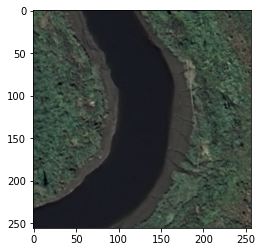

In [ ]:
import matplotlib.pylab as plt # Loading the matplotlib library 

plt.imshow(image_data[196]) # printing out the image data of image number 196, you can chose any other number based on your choice.

Now let's define class ( or types of different images in our dataset). As we have seen, we have three different classes in our dataset ( river, forest and buildings). There are different ways to assign classes to images, we will be following an "one hot encoder" representation verison of the classes ( more details in the later cells). 

In [ ]:
classes = np.zeros(image_data.shape[0], dtype=np.uint16) # deploying an empty array of shape 294 ( since that is the total number of images that we have)
classes[0:97] = 0 #  We have our first set of images from image image 0 to 97, so defining a lebel 0 for them.
classes[97:196] = 1 #  We have our second set of images from image image 97 to 196, so defining a lebel 1 for them.
classes[196:] = 2 #  We have our third set of images from image image 196 to last, so defining a lebel 2 for them.

One hot encoding is a highly essential part of the feature engineering process. To teach the computer, which specific image belong to specific class, we use these process.  For example, we had our variables like building, forest and river, we could encode each of these labels as a three-element binary vector as Building: [1, 0, 0], Forest: [0, 1, 0], River: [0, 0, 1]. The Categorical data while processing, must be converted to a numerical form. One-hot encoding is generally applied to the integer representation of the data. Here the integer encoded variable is removed and a new binary variable is added for each unique integer value. During the process, it takes a column that has categorical data, which has been label encoded and then splits the following column into multiple columns. The numbers are replaced by 1s and 0s randomly, depending on which column has what value.

In [ ]:
onehot_classes = np.zeros((classes.size, classes.max() + 1)) # we define a numpy array as the one-hot-encoder representation
onehot_classes[np.arange(classes.size), classes] = 1 # depending on the classes, we are seperating the representation

Just to explore how the One hot encoding representation looks for the first image in every set, lets print them out.

In [ ]:
print("A building image is represented as: ", onehot_classes[0])
print("A forest image is  represented as: ", onehot_classes[97])
print("A river image is represented as: ", onehot_classes[196])

A building image is represented as:  [1. 0. 0.]
A forest image is  represented as:  [0. 1. 0.]
A river image is represented as:  [0. 0. 1.]


Now there is a basic terminology in neural networks which is training and testing. Training means that we want to teach the neural network to identify the object. So that, when they analyze the image, they can predict its label. To train, we have to set a basic set of rules; since the neural network will learn based on the available resources. So as a general practice, we will only feed a set of data through which it will learn which is known as training data. And later, we will test the performance on the test set. So in the next task, we will explore these three parcellation of the dataset.

In [ ]:
from sklearn.model_selection import train_test_split # importing scikitlearn train test split package to randomly split the training and testing images

x_train, x_test, y_train, y_test = train_test_split(image_data, onehot_classes, test_size=0.33, random_state=42) # the test size defines we will be implementing a 67 % for testing and 33% for training. random_test defines the reproducibility of these random percellation.

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (196, 256, 256, 3)
y_train shape: (196, 3)
196 train samples
98 test samples


As we can see, we have a 196 training set and 98 testing set (apperant from the training and testing set). The shape defines the actual shape that will be fed into the ml model.

In [ ]:
# Scale images to the [0, 1] range, such normalizations usually improve the performance of the model
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

Now that we have done with the basic data preprocessing, we wll implement the CNN using keras library. 

In [ ]:
from tensorflow.keras import datasets, layers, models # importing tensorflow's necessary packages
import tensorflow.keras as keras # importing keras from the tensorflow backend

input_shape = (256, 256, 3) # Our input shape for the model, which is the dimension of each images

num_classes = 3 # The three classes that we will distinguish.

# Right now we will build our model using the sequential layer configuration 

model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape), # The first argument is filter, which specifies the dimensionality of the output space (i.e. the number of output filters in the convolution). Kernel size defines the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions. We will be implementing a non-linear activation as rectified linear unit or ReLU at the end of each convolution block.
        layers.MaxPooling2D(pool_size=(2, 2)), # Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. 
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # Again applying the same convolution layer with the similar configuration 
        layers.MaxPooling2D(pool_size=(2, 2)), # Downsampling it using the similar maxpool layer that we did before.
        layers.Flatten(), # flattens the multi-dimensional input data into a single dimension, so we can model our input layer and build our neural network model, then pass those data into every single neuron of the model effectively.
        layers.Dense(num_classes, activation="softmax"), # then re-configure the output layer to three class and apply softmax activation.
    ]
)

model.summary() # the model.summary provides the details information of the model ( interms of shape of the output layers and number of total trainable parameters in each layers)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 123008)            0         
                                                                 
 dense_2 (Dense)             (None, 3)                

In [ ]:
batch_size = 128 # The batch size defines the number of samples that will be propagated through the network in each iteration.
epochs = 50 # Epoch is how in each iteration the models weights and bias are being updated

# there are some other parameters that we need to define before compiling the model.
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. Since its a classificaton problem, we are using categorical cross entropy.
# This is how the model is updated based on the data it sees and its loss function. We are using ADAM optimzer

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1) # train the model using the conditions that we set and also look at the accuracy and the loss. Ideally the loss should decrese and the model accuracy would increase.

Epoch 1/50
2/2 [==============================] - 8s 2s/step - loss: 0.8980 - accuracy: 0.6761 - val_loss: 4.0206 - val_accuracy: 0.4000
Epoch 2/50
2/2 [==============================] - 7s 2s/step - loss: 1.3650 - accuracy: 0.7216 - val_loss: 0.7060 - val_accuracy: 0.6000
Epoch 3/50
2/2 [==============================] - 7s 2s/step - loss: 0.4781 - accuracy: 0.8182 - val_loss: 1.0168 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 7s 2s/step - loss: 0.5952 - accuracy: 0.7614 - val_loss: 0.8404 - val_accuracy: 0.6500
Epoch 5/50
2/2 [==============================] - 7s 2s/step - loss: 0.3785 - accuracy: 0.9034 - val_loss: 1.2422 - val_accuracy: 0.4500
Epoch 6/50
2/2 [==============================] - 7s 2s/step - loss: 0.4872 - accuracy: 0.8636 - val_loss: 1.1267 - val_accuracy: 0.5500
Epoch 7/50
2/2 [==============================] - 7s 2s/step - loss: 0.4002 - accuracy: 0.8864 - val_loss: 0.7264 - val_accuracy: 0.6500
Epoch 8/50
2/2 [=========================

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test acc:", results[1]*100)

Evaluate on test data
1/1 [==============================] - 1s 1s/step - loss: 0.8678 - accuracy: 0.7041
test acc: 70.4081654548645


So as we can see we have scored a accuracy of around 70%